# Basic cartoframes functionality

Let's download the datasets used on this example (if needed)

In [1]:
import requests
import os.path
def download(url,local_filename):
    if os.path.exists(local_filename):
        print('File already exists, quiting')
    else:
        print('Downloading {}...'.format(local_filename))
        r = requests.get(url, stream=True)
        with open(local_filename, 'wb') as f:
            for chunk in r.iter_content(chunk_size=1024): 
                if chunk: # filter out keep-alive new chunks
                    f.write(chunk)

# Downloading from a shared Drive folder
download('https://drive.google.com/uc?export=download&id=0B392y-77KML9dVZLZzc2aXJNVlE', 'brooklyn_poverty.gpkg')
download('https://drive.google.com/uc?export=download&id=0B392y-77KML9dTFYZ052aExTTTA', 'taxi_sample.csv')         


Now we can start with `cartoframes`, yay!

In [2]:
import cartoframes
from cartoframes.credentials import set_credentials
from cartoframes.credentials import credentials
import pandas as pd
import os

Get the credentials from a previous version, from environment variables or directly here

In [3]:
try:
    credentials()
    print('Getting the credentials from a previous session')
except Exception as e:
    print('Getting the credentials from your environment or here')
    # BASEURL are in the format:
    #  https://USERNAME.carto.com  -- for all cloud users, even if in a multiuser organization
    #  for on premise installs, contact your admin
    BASEURL = os.environ.get('CARTO_API_URL','https://jsanz.carto.com') # <-- replace with your username or set up the envvar
    APIKEY = os.environ.get('CARTO_API_KEY',False) # <-- replace False with your CARTO API key or set up the envvar
    if BASEURL and APIKEY:
        set_credentials(base_url=BASEURL, api_key=APIKEY, overwrite=True)
    else:
        print('Set up your environment!')

if credentials():
    cc = cartoframes.CartoContext()

Getting the credentials from a previous session


In [4]:
# Asuming you've already uploaded the brooklyn poverty geopackage to your account
# Get a CARTO table as a pandas DataFrame
df = cc.read('brooklyn_poverty')
df.head()

CartoException: ['relation "brooklyn_poverty" does not exist']

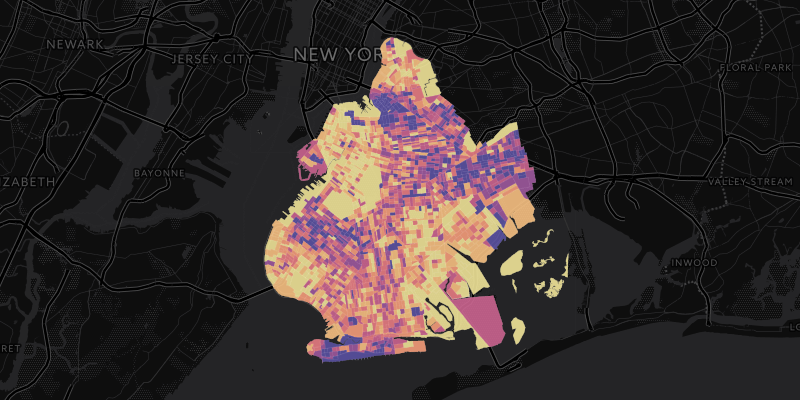

In [10]:
from cartoframes import Layer, styling
l = Layer('brooklyn_poverty', color={'column': 'poverty_per_pop', 'scheme': styling.sunset(7)})
cc.map(layers=l, interactive=False)

In [11]:
# read in a CSV of NYC taxi data
df = pd.read_csv('taxi_sample.csv')
df.head()

,unnamed_0,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,ratecodeid,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,303227,2,2016-05-01 14:52:11+00,2016-05-01 15:00:36+00,2,2.08,-74.006706,40.730461,1,False,-74.012383,40.706779,1,8.5,0.0,0.5,1.00,0.0,0.3,10.30
1,183993,1,2016-05-01 08:34:08+00,2016-05-01 08:49:02+00,1,3.00,-73.924957,40.744125,1,False,-73.973824,40.762779,1,13.5,0.0,0.5,2.00,0.0,0.3,16.30
2,1434785,1,2016-05-04 09:44:40+00,2016-05-04 10:07:09+00,1,2.10,-73.973488,40.748501,1,False,-73.998955,40.740833,2,14.5,0.0,0.5,0.00,0.0,0.3,15.30
3,421142,2,2016-05-01 20:50:11+00,2016-05-01 21:05:24+00,1,4.41,-73.999786,40.743267,1,False,-73.966362,40.792370,2,15.0,0.5,0.5,0.00,0.0,0.3,16.30
4,547655,2,2016-05-02 07:26:56+00,2016-05-02 07:53:53+00,2,4.01,-73.963631,40.803360,1,False,-73.956963,40.784939,1,19.5,0.0,0.5,4.06,0.0,0.3,24.36


In [12]:
# send it to carto so we can map it
cc.write(df, 'taxi_sample',
         lnglat=('pickup_longitude', 'pickup_latitude'),
         overwrite=True)
df.head()

Creating geometry out of columns `pickup_longitude`/`pickup_latitude`
Table successfully written to CARTO: https://jsanz.carto.com/dataset/taxi_sample


,unnamed_0,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,ratecodeid,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,303227,2,2016-05-01 14:52:11+00,2016-05-01 15:00:36+00,2,2.08,-74.006706,40.730461,1,False,-74.012383,40.706779,1,8.5,0.0,0.5,1.00,0.0,0.3,10.30
1,183993,1,2016-05-01 08:34:08+00,2016-05-01 08:49:02+00,1,3.00,-73.924957,40.744125,1,False,-73.973824,40.762779,1,13.5,0.0,0.5,2.00,0.0,0.3,16.30
2,1434785,1,2016-05-04 09:44:40+00,2016-05-04 10:07:09+00,1,2.10,-73.973488,40.748501,1,False,-73.998955,40.740833,2,14.5,0.0,0.5,0.00,0.0,0.3,15.30
3,421142,2,2016-05-01 20:50:11+00,2016-05-01 21:05:24+00,1,4.41,-73.999786,40.743267,1,False,-73.966362,40.792370,2,15.0,0.5,0.5,0.00,0.0,0.3,16.30
4,547655,2,2016-05-02 07:26:56+00,2016-05-02 07:53:53+00,2,4.01,-73.963631,40.803360,1,False,-73.956963,40.784939,1,19.5,0.0,0.5,4.06,0.0,0.3,24.36


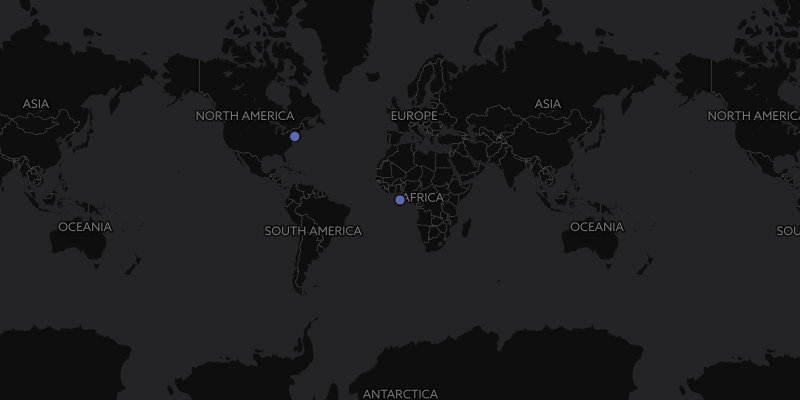

In [13]:
from cartoframes import Layer
cc.map(layers=Layer('taxi_sample'),
       interactive=False)

Oops, there are some zero-valued long/lats in there, so the results are going to [null island](https://en.wikipedia.org/wiki/Null_Island). Let's remove them.

In [14]:
df = df[(df['pickup_longitude'] != 0) | (df['pickup_latitude'] != 0)]
cc.write(df, 'taxi_sample', overwrite=True,
         lnglat=('pickup_longitude', 'pickup_latitude'))

Creating geometry out of columns `pickup_longitude`/`pickup_latitude`
Table successfully written to CARTO: https://jsanz.carto.com/dataset/taxi_sample


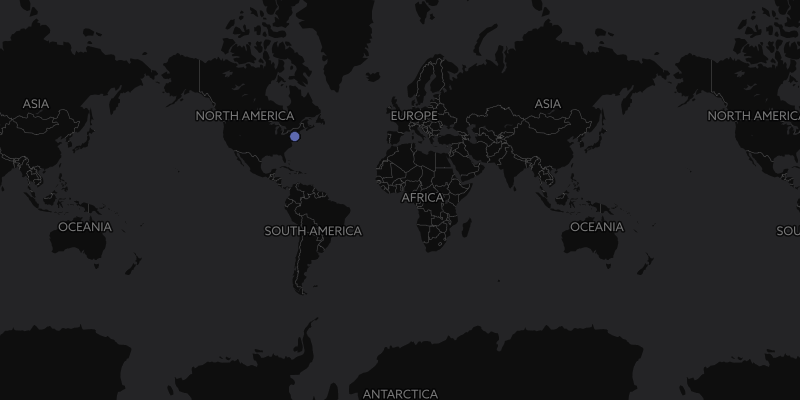

In [15]:
from cartoframes import Layer
cc.map(layers=Layer('taxi_sample'),
       interactive=False)

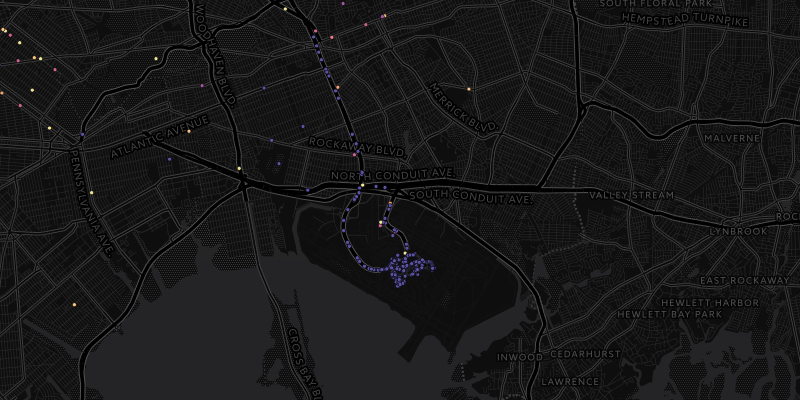

In [16]:
# Let's take a look at what's going on at JFK airport, styled by the fare amount
cc.map(layers=Layer('taxi_sample',
                    size=4,
                    color={'column': 'fare_amount',
                           'scheme': styling.sunset(7)}),
       zoom=12, lng=-73.7880, lat=40.6629,
       interactive=False)

Remove the dataset

In [17]:
cc.delete('taxi_sample')